In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def loadData():
    #df = pd.read_csv('/sgoinfre/goinfre/Perso/pdespres/ensdata/train_redux.csv')
    #y = pd.read_csv('/sgoinfre/goinfre/Perso/pdespres/ensdata/y.csv', sep=';', usecols=[1])
    #df = pd.read_csv('~/Downloads/train_concat_95_00001.csv')
    #y = pd.read_csv('~/Downloads/y.csv', sep=';', usecols=[1])
    #df = pd.read_csv('E:\\Downloads\\train_redux.csv', nrows=10000)
    df = pd.read_csv('E:\\Downloads\\train_concat_95_00001.csv')
    y = pd.read_csv('E:\\Downloads\\y.csv', sep=';', usecols=[1])
    print("Datas loaded")
    return df, y

df, y = loadData()
X_train, X_test, y_train, y_test = train_test_split(df, y.values.ravel(), test_size=.3)

Datas loaded


In [5]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

y = pd.read_csv('E:\\Downloads\\y.csv', sep=';', usecols=[1])

for i in range(80,100):
    name = 'E:\\Downloads\\train_correlated_' + str(i) + '.csv'
    df = pd.read_csv(name, nrows=8000)
    X_train, X_test, y_train, y_test = train_test_split(df, y.values.ravel(), test_size=.35)
    
    names = ["Linear SVM", "RBF SVM", 
         "Random Forest", "AdaBoost",
         "Naive Bayes", "Logistic Regression"]

    classifiers = [
        SVC(kernel="linear"),
        SVC(),
        RandomForestClassifier(n_estimators=100),
        AdaBoostClassifier(),
        GaussianNB(),
        LogisticRegression()]
    
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Determine the false positive and true positive rates
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(X_test)[:, 1]
        else:  # use decision function
            prob_pos = clf.decision_function(X_test)
        fpr, tpr, _ = roc_curve(y_test, prob_pos)

        # Calculate the AUC
        roc_auc = auc(fpr, tpr)
        print('%s %s score: %0.2f ROC AUC: %0.2f' % (str(i), name, score, roc_auc))


80 Linear SVM score: 0.68 ROC AUC: 0.74
80 RBF SVM score: 0.73 ROC AUC: 0.80
80 Random Forest score: 0.62 ROC AUC: 0.66
80 AdaBoost score: 0.63 ROC AUC: 0.68
80 Naive Bayes score: 0.67 ROC AUC: 0.73
80 Logistic Regression score: 0.68 ROC AUC: 0.75
81 Linear SVM score: 0.66 ROC AUC: 0.72
81 RBF SVM score: 0.73 ROC AUC: 0.80
81 Random Forest score: 0.62 ROC AUC: 0.66
81 AdaBoost score: 0.64 ROC AUC: 0.69
81 Naive Bayes score: 0.67 ROC AUC: 0.73
81 Logistic Regression score: 0.67 ROC AUC: 0.74
82 Linear SVM score: 0.67 ROC AUC: 0.72
82 RBF SVM score: 0.73 ROC AUC: 0.80
82 Random Forest score: 0.62 ROC AUC: 0.67
82 AdaBoost score: 0.64 ROC AUC: 0.69
82 Naive Bayes score: 0.67 ROC AUC: 0.73
82 Logistic Regression score: 0.69 ROC AUC: 0.74
83 Linear SVM score: 0.66 ROC AUC: 0.73
83 RBF SVM score: 0.73 ROC AUC: 0.80
83 Random Forest score: 0.62 ROC AUC: 0.67
83 AdaBoost score: 0.65 ROC AUC: 0.70
83 Naive Bayes score: 0.68 ROC AUC: 0.73
83 Logistic Regression score: 0.67 ROC AUC: 0.74
84 Linea

Linear SVM score: 0.71 ROC AUC: 0.79
RBF SVM score: 0.76 ROC AUC: 0.84
Random Forest score: 0.66 ROC AUC: 0.74
AdaBoost score: 0.68 ROC AUC: 0.74
Naive Bayes score: 0.68 ROC AUC: 0.73
Logistic Regression score: 0.73 ROC AUC: 0.81


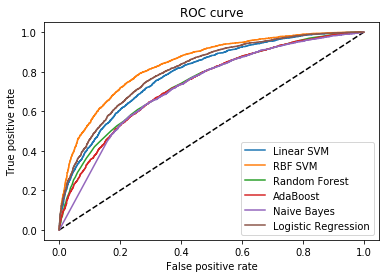

In [2]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

names = ["Linear SVM", "RBF SVM", 
         "Random Forest", "AdaBoost",
         "Naive Bayes", "Logistic Regression"]
#svm.SVC(kernel='poly', degree=3, C=C))
classifiers = [
    SVC(kernel="linear", C=1, random_state=42),
    SVC(random_state=42),
    RandomForestClassifier(n_estimators=200, random_state=42),
    AdaBoostClassifier(),
    GaussianNB(),
    LogisticRegression()]

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')

# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    
    # Determine the false positive and true positive rates
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, prob_pos)

    # Calculate the AUC
    roc_auc = auc(fpr, tpr)
    print('%s score: %0.2f ROC AUC: %0.2f' % (name, score, roc_auc))

    plt.plot(fpr, tpr, label=name)
    
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [6]:
df.shape

(26500, 4146)